# 用python实现k-means算法

## 1.为待聚类的点随机寻找聚类中心
## 2.计算每个点到聚类中心的距离，将各个点归类到离该点最近的聚类中心去
## 3.计算每个聚类中所有点的平均值，并将这个平均值作为新的聚类中心
## 重复2-3，直到聚类中心不再进行大范围移动或者聚类次数达到迭代要求

In [2]:
import numpy as np
from matplotlib import pyplot

In [7]:
class K_Means(object):
    # k为簇的个数，tolerance‘中心误差点’，max_iter迭代次数
    def __init__(self,k=2,tolerance=0.0001,max_iter=300):
        self.k_=k
        self.tolerance_=tolerance
        self.max_iter_=max_iter
    def fit(self,data):
        self.centers_={}
        #初始化聚类中心
        for i in range(self.k_):
            self.centers_[i]=data[i]
        #进行迭代
        for i in range(self.max_iter_):
            self.cls_={}
            for i in range(self.k_):
                self.cls_[i]=[]
            for feature in data:
                distances=[]
                for center in self.centers_:
                    #欧式距离
                    distances.append(np.linalg.norm(feature-self.centers_[center]))
                classfication=distances.index(min(distances))#分类结果
                self.cls_[classfication].append(feature)
            # 更新聚类中心
            prev_centers=dict(self.centers_)
            for c in self.cls_:
                self.centers_[c]=np.average(self.cls_[c],axis=0)
            # '中心点'是否在误差范围
            optimized=True
            for center in self.centers_:
                org_center=prev_centers[center]
                cur_center=self.centers_[center]
                if np.sum((cur_center-org_center)/cur_center*100)>self.tolerance_:
                    optimized=False
            #聚类中心不再进行大范围移动
            if optimized:
                break
    def predict(self,p_data):
        distances=[np.linalg.norm(p_data-self.centers_[center]) for center in self.centers_]
        index=distances.index(min(distances))
        return index

{0: array([1.16666667, 1.46666667]), 1: array([7.33333333, 9.        ])}


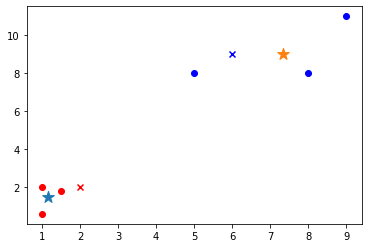

In [8]:
x = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])
k_means = K_Means(k=2)
k_means.fit(x)
print(k_means.centers_)
for center in k_means.centers_:
    pyplot.scatter(k_means.centers_[center][0], k_means.centers_[center][1], marker='*', s=150)
for cat in k_means.cls_:
    for point in k_means.cls_[cat]:
        pyplot.scatter(point[0],point[1],c=('r' if cat==0 else 'b'))
predicts=[[2,2],[6,9]]
for feature in predicts:
    cat=k_means.predict(feature)# 预测的类别
    pyplot.scatter(feature[0],feature[1],c=('r' if cat==0 else 'b'),marker='x')

## Masked attention
## 对于第$i$个token，只与$0...i$个token有关，不考虑$i$后面的token

In [9]:
import torch 

In [10]:
X=torch.randn((4,10))
W_Q=torch.randn((10,20))
W_K=torch.randn((10,20))
W_V=torch.randn((10,20))


In [13]:
Q=torch.mm(X,W_Q)
K=torch.mm(X,W_K)
V=torch.mm(X,W_V)

In [30]:
weight=torch.mm(Q,torch.transpose(K,1,0))
weight.shape

torch.Size([4, 4])

In [31]:
M=torch.ones((4,4))
for i in range(0,len(M)):
    for j in range(0,len(M[0])):
        if i<j:
            M[i,j]=float("-inf")
M

tensor([[1., -inf, -inf, -inf],
        [1., 1., -inf, -inf],
        [1., 1., 1., -inf],
        [1., 1., 1., 1.]])

In [39]:
weight=torch.softmax(weight,dim=1)
weight


tensor([[3.6945e-19, 8.6817e-05, 1.4013e-45, 9.9991e-01],
        [2.5924e-21, 1.0000e+00, 5.0276e-38, 1.6760e-17],
        [9.0568e-31, 8.9451e-39, 1.0000e+00, 1.0489e-38],
        [5.0348e-21, 1.0000e+00, 1.8555e-35, 1.0188e-08]])

In [40]:
weight_fi=weight*M 
weight_fi

tensor([[3.6945e-19,       -inf,       -inf,       -inf],
        [2.5924e-21, 1.0000e+00,       -inf,       -inf],
        [9.0568e-31, 8.9451e-39, 1.0000e+00,       -inf],
        [5.0348e-21, 1.0000e+00, 1.8555e-35, 1.0188e-08]])

In [41]:
weight_fi=torch.softmax(weight_fi,dim=1)
weight_fi

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.2689, 0.7311, 0.0000, 0.0000],
        [0.2119, 0.2119, 0.5761, 0.0000],
        [0.1749, 0.4754, 0.1749, 0.1749]])

In [43]:
V

tensor([[-8.3653e-01, -1.7534e-01, -1.1007e+00,  1.1704e+00,  4.5017e+00,
         -4.2089e+00,  2.2445e+00,  1.4882e+00,  1.0894e+00,  5.8876e-01,
         -3.1278e-03,  2.3819e+00,  7.5268e-01, -4.2440e-01, -2.0751e+00,
          1.0800e+00, -3.7827e+00,  2.5643e+00, -1.2950e+00, -4.2986e+00],
        [ 1.7368e+00,  1.1286e+00,  7.9239e-01, -1.4574e+00,  1.0840e+00,
          7.7133e-01, -2.2065e+00, -2.3728e+00,  6.1001e-01,  3.4452e+00,
          1.2808e+00, -1.5998e+00,  5.7868e+00,  7.9472e-01,  1.3784e+00,
          1.8769e+00,  2.5356e+00, -5.2290e-01,  3.9733e+00, -1.0739e+00],
        [-1.7081e+00, -1.2981e+00, -4.7731e+00, -3.8299e+00, -2.9048e+00,
         -4.5694e+00, -2.7163e+00, -4.3415e+00,  4.8237e-01,  1.7230e-01,
         -1.0619e+00, -7.4238e-01,  5.9505e+00, -2.7890e+00, -2.6351e+00,
          3.9709e+00,  1.1203e+00,  4.5517e+00,  6.4603e+00,  1.0005e+00],
        [ 1.1911e+00, -1.5734e+00,  7.4137e-02, -1.6040e+00,  1.7254e+00,
         -2.3717e+00,  1.5402e+00, 

In [42]:
att_V=torch.mm(weight_fi,V)
att_V

tensor([[-8.3653e-01, -1.7534e-01, -1.1007e+00,  1.1704e+00,  4.5017e+00,
         -4.2089e+00,  2.2445e+00,  1.4882e+00,  1.0894e+00,  5.8876e-01,
         -3.1278e-03,  2.3819e+00,  7.5268e-01, -4.2440e-01, -2.0751e+00,
          1.0800e+00, -3.7827e+00,  2.5643e+00, -1.2950e+00, -4.2986e+00],
        [ 1.0447e+00,  7.7795e-01,  2.8327e-01, -7.5067e-01,  2.0032e+00,
         -5.6805e-01, -1.0094e+00, -1.3344e+00,  7.3892e-01,  2.6770e+00,
          9.3552e-01, -5.2895e-01,  4.4329e+00,  4.6685e-01,  4.4963e-01,
          1.6626e+00,  8.3635e-01,  3.0738e-01,  2.5564e+00, -1.9411e+00],
        [-7.9328e-01, -5.4583e-01, -2.8152e+00, -2.2673e+00, -4.8965e-01,
         -3.3611e+00, -1.5568e+00, -2.6887e+00,  6.3807e-01,  9.5423e-01,
         -3.4100e-01, -2.6193e-01,  4.8142e+00, -1.5283e+00, -1.6658e+00,
          2.9144e+00,  3.8110e-01,  3.0550e+00,  4.2895e+00, -5.6223e-01],
        [ 5.8890e-01,  3.6830e-03, -6.3755e-01, -1.4384e+00,  1.0963e+00,
         -1.5832e+00, -8.6205e-01, 

## cross-attention 